In [16]:
# Install these  libraries
# !pip install gymnasium
# !pip install gymnasium[toy-text]
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [17]:
import gymnasium as gym

# mediante la función make creamos el entorno de rl a simular (taxi-v3)
# el entorno consiste en la simulación de un proceso de decisión de markov.
env = gym.make("Taxi-v3", render_mode="rgb_array")

In [18]:
# Compuesto fundamentalmente de observaciones e información adicional, así como posibles acciones a ejecutar.
observation, info = env.reset(seed=42)

In [19]:
info

{'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}

In [20]:
# ver documentación tex toys-> taxi. donde explica la codificación de estados y acciones
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


Timesteps taken: 25
Total Reward: 0


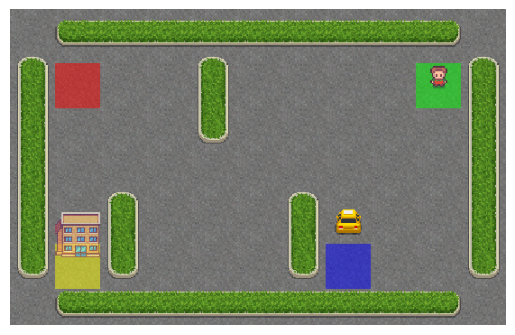

In [21]:
# 1.- Vamos a ejecutar una estrategia con acciones escogidas al azar.
#env.s = 328  # set environment to illustration's state
import time
epochs = 0
penalties, reward = 0, 0
G = 0
frames = [] # for animation
done = False
observation, info = env.reset(seed=42)
#while not done:
for i in range(25):

    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    time.sleep(0.3)
    action = env.action_space.sample() # muestreamos una acción al azar
    state, reward, done, truncated,info = env.step(action) # ejecutamos dicha acción en nuestro entorno.
    
    G += reward
    epochs += 1

    
print("Timesteps taken: {}".format(epochs))
print("Total Reward: {}".format(penalties))

Q-LEARNING

Episode: 30000
Training finished.



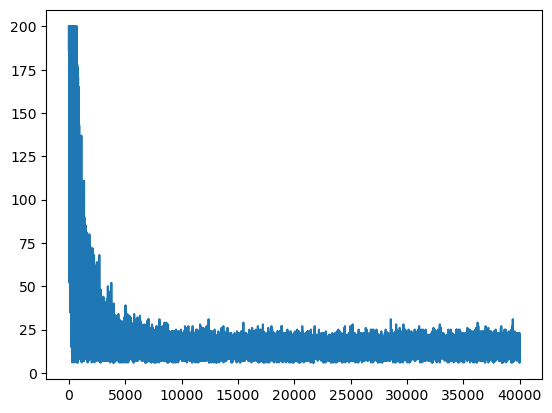

In [22]:
# Implementación del algoritmo Q-Learning
import random
import numpy as np
from IPython.display import clear_output     
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1
EPOCHS = 40000
# For plotting metrics
all_epochs_steps = []
all_cum_rewards = []
env = gym.make("Taxi-v3", render_mode="none") # ponemos render mode igual a no por velocidad de implentación.

Q = np.zeros((env.observation_space.n, env.action_space.n))

#Function to choose the next action
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore action space
    else:
        action = np.argmax(Q[state, :]) # Exploit learned values
    return action
 
#Function to learn the Q-value using qlearning
def update(state, state2, reward, action):
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2])
    Q[state, action] = Q[state, action] + alpha * (target - predict)


for i in range(1, EPOCHS):
    state, info = env.reset()
    epochs, penalties, reward, = 0, 0, 0
    done, truncated = False, False
    G = 0
    
    while not (done or truncated):

        # Primero ejecutamos nuestra estrategia de exploración (epsilon-greedy)
        action = choose_action(state)
   
        # Ejecutamos la acción
        next_state, reward, done, truncated, info = env.step(action) 
        
        # actualizamos la tabla
        update(state, next_state, reward, action)
        
        state = next_state
        G += reward
        epochs += 1
        
    if i % 10000 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
    
    all_epochs_steps += [epochs]
    all_cum_rewards += [G]

print("Training finished.\n")
# visualize training epochs steps
import matplotlib.pyplot as plt
plt.plot(all_epochs_steps)

# visualize training cumulative rewards
#plt.plot(all_cum_rewards)


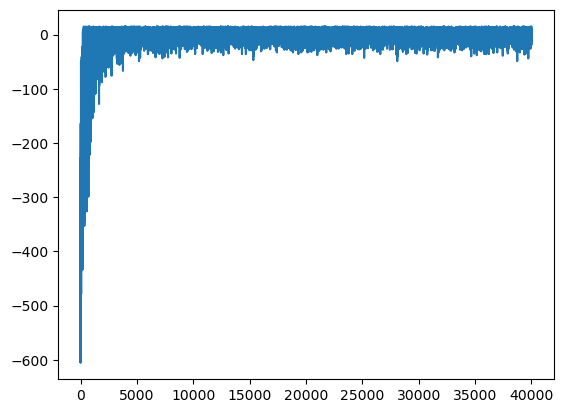

In [23]:
plt.plot(all_cum_rewards)

In [24]:
Q

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.41807447,  -2.3636509 ,  -2.41823782,  -2.36386648,
         -2.27325184, -11.3557064 ],
       [ -1.8700495 ,  -1.45068679,  -1.87030294,  -1.45119898,
         -0.7504    , -10.44714216],
       ...,
       [ -1.16851741,   0.41599536,  -1.1572724 ,  -1.25237916,
         -4.731974  ,  -2.73914169],
       [ -2.1276782 ,  -2.11636127,  -2.11768906,  -2.11584462,
         -5.08921197,  -2.86948679],
       [  2.38993037,   0.48682883,   2.48067786,  10.99999996,
         -1.89502589,  -1.45671446]])

Average timesteps : 14
Average penalties : 20


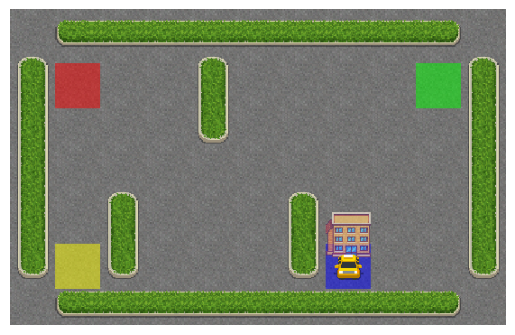

In [27]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0

env = gym.make("Taxi-v3", render_mode="rgb_array")
#env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
state,info = env.reset()
epochs, penalties, reward = 0, 0, 0
    
done, truncated = False, False

while not (done or truncated):
    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    time.sleep(0.3)
    action = np.argmax(Q[state])
    state, reward, done, truncated, info = env.step(action)



    epochs += 1


total_penalties += reward
total_epochs += epochs

print(f"Average timesteps : {total_epochs }")
print(f"Average penalties : {total_penalties }")